<a href="https://colab.research.google.com/github/Kennedy-Vizcaino/my-python-application/blob/main/My_Cars_EDA_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 🚗 Car Sales Inventory Visualization Project

Welcome to my Car Sales Inventory Dashboard project! In this scenario, I take on the role of a car salesperson tasked with managing a used car inventory. The dataset represents the current state of my dealership's inventory, but it’s slightly outdated—so my first step is to clean it up by filtering out vehicles that no longer meet current sales criteria.

🧑‍💼 Project Scenario
I’ve recently received inquiries from two potential customers, each with specific preferences for the vehicles they're interested in:

Customer #1 is looking for a sedan in either black or white, manufactured between 2016 and 2019, and in good, excellent, or like new condition. They are open to exploring all car models to ensure they get the best possible deal.

Customer #2 is searching for a red or blue SUV, also from the model years 2016 to 2019, and in good, excellent, or like new condition. Like the first customer, she hasn't decided on a specific model and wants to compare her options to find the best value.

📊 What I Built
To better showcase what's available to each customer, I filtered the dataset based on their preferences and created clear, easy-to-interpret scatter plots that visualize the relationship between price and mileage for each matching car.

For each customer, I generated 8 scatter plots:

Divided by paint color (2 colors)

Split by model year (4 years)

Showing price vs. mileage, with each car color-coded by model

Annotated with the number of vehicles available per plot

These visualizations help illustrate the range of options available, making it easier for each customer to compare and choose.

🛠️ Tools & Libraries Used
Python

Pandas – Data filtering and preprocessing

Matplotlib & Seaborn – Static visualizations

Distinctipy – For generating unique, visually distinct colors for car models

In [ ]:
#in this code I am importing my data frame ,the necessary libraries ,and also getting a glimsp of what my data frame consist of.
#also in this code I am downloading the program "distinctipy" which is a program that allows me to generate colours that are visually distinct from one another, that would essentially allow my visualizations to be more vissually appealing.
!pip install distinctipy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch
import distinctipy
df=pd.read_csv('/content/vehicles_us.csv')
print(df.head())
print(df.shape)
print(df.columns)
print(df.info())
print(df.describe())


   price  model_year           model  condition  cylinders fuel  odometer  \
0   9400      2011.0          bmw x5       good        6.0  gas  145000.0   
1  25500         NaN      ford f-150       good        6.0  gas   88705.0   
2   5500      2013.0  hyundai sonata   like new        4.0  gas  110000.0   
3   1500      2003.0      ford f-150       fair        8.0  gas       NaN   
4  14900      2017.0    chrysler 200  excellent        4.0  gas   80903.0   

  transmission    type paint_color  is_4wd date_posted  days_listed  
0    automatic     SUV         NaN     1.0  2018-06-23           19  
1    automatic  pickup       white     1.0  2018-10-19           50  
2    automatic   sedan         red     NaN  2019-02-07           79  
3    automatic  pickup         NaN     NaN  2019-03-22            9  
4    automatic   sedan       black     NaN  2019-04-02           28  
(51525, 13)
Index(['price', 'model_year', 'model', 'condition', 'cylinders', 'fuel',
       'odometer', 'transmission

In [ ]:
# in this code I am creating a variable and grounping it by the columns "model_year" , 'price' , 'model', 'condition' , and 'paint_color'
grouped = df.groupby(['model_year', 'price', 'model', 'condition','paint_color']).size().reset_index(name='count')
print(grouped.head())
print(grouped.tail)

   model_year  price              model  condition paint_color  count
0      1908.0  12995  cadillac escalade  excellent       white      1
1      1908.0  12995          gmc yukon       good       black      1
2      1929.0  18000         ford f-150       good      silver      1
3      1936.0   5000         ford f-150  excellent      purple      1
4      1948.0  21000   chevrolet impala   like new         red      1
<bound method NDFrame.tail of        model_year  price                       model  condition paint_color  \
0          1908.0  12995           cadillac escalade  excellent       white   
1          1908.0  12995                   gmc yukon       good       black   
2          1929.0  18000                  ford f-150       good      silver   
3          1936.0   5000                  ford f-150  excellent      purple   
4          1948.0  21000            chevrolet impala   like new         red   
...           ...    ...                         ...        ...         ... 

In [ ]:
#here in this code I am droping missing values in the "model_year" column, and I am also changing the 'model_year' column from a float64 column to a int64 column.
df = df.dropna(subset=['model_year'])
df['model_year'] = df['model_year'].astype(int)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 47906 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         47906 non-null  int64  
 1   model_year    47906 non-null  int64  
 2   model         47906 non-null  object 
 3   condition     47906 non-null  object 
 4   cylinders     43009 non-null  float64
 5   fuel          47906 non-null  object 
 6   odometer      40563 non-null  float64
 7   transmission  47906 non-null  object 
 8   type          47906 non-null  object 
 9   paint_color   39291 non-null  object 
 10  is_4wd        23764 non-null  float64
 11  date_posted   47906 non-null  object 
 12  days_listed   47906 non-null  int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 5.1+ MB
None


<ipython-input-5-145633105ba3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['model_year'] = df['model_year'].astype(int)


In [ ]:
#in this code I am filtering my dataframe so I can easily locate cars that are produced from the year equal to 2016 or greater , that match the paint color black or white , also the condition has to be equal to 'like new' , 'good , or 'excellent.
filtered_df = df[
    (df['model_year'] >= 2016) &
    (df['paint_color'].isin(['black', 'white'])) &
    (df['condition'].isin(['like new', 'good', 'excellent']))
]

#Display the result
print(filtered_df.head())

    price  model_year            model  condition  cylinders fuel  odometer  \
4   14900        2017     chrysler 200  excellent        4.0  gas   80903.0   
62  10499        2017  chevrolet cruze       good        4.0  gas   53601.0   
64  15999        2017  chevrolet cruze       good        4.0  gas   17498.0   
93  32000        2017      honda pilot   like new        6.0  gas   32104.0   
95   9995        2017   hyundai sonata  excellent        4.0  gas  105985.0   

   transmission   type paint_color  is_4wd date_posted  days_listed  
4     automatic  sedan       black     NaN  2019-04-02           28  
62    automatic  sedan       black     NaN  2019-01-13           48  
64    automatic  sedan       black     NaN  2018-11-07           54  
93    automatic    SUV       white     NaN  2018-07-12          100  
95    automatic  sedan       white     NaN  2018-05-02           18  


In [ ]:
#in this code I am creating a a variable 'categorized_mileage to better identify cars I would consider "low" , 'medium' , and 'high'.
def categorize_mileage(miles):
    if pd.isna(miles):
        return 'unknown'
    elif miles < 60000:
        return 'low'
    elif miles <= 120000:
        return 'medium'
    else:
        return 'high'

df['mileage_category'] = df['odometer'].apply(categorize_mileage)

# Preview the updated DataFrame
print(df[['odometer', 'mileage_category']].head())



   odometer mileage_category
0  145000.0             high
2  110000.0           medium
3       NaN          unknown
4   80903.0           medium
5   57954.0              low


<ipython-input-7-55e291cceaa1>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mileage_category'] = df['odometer'].apply(categorize_mileage)


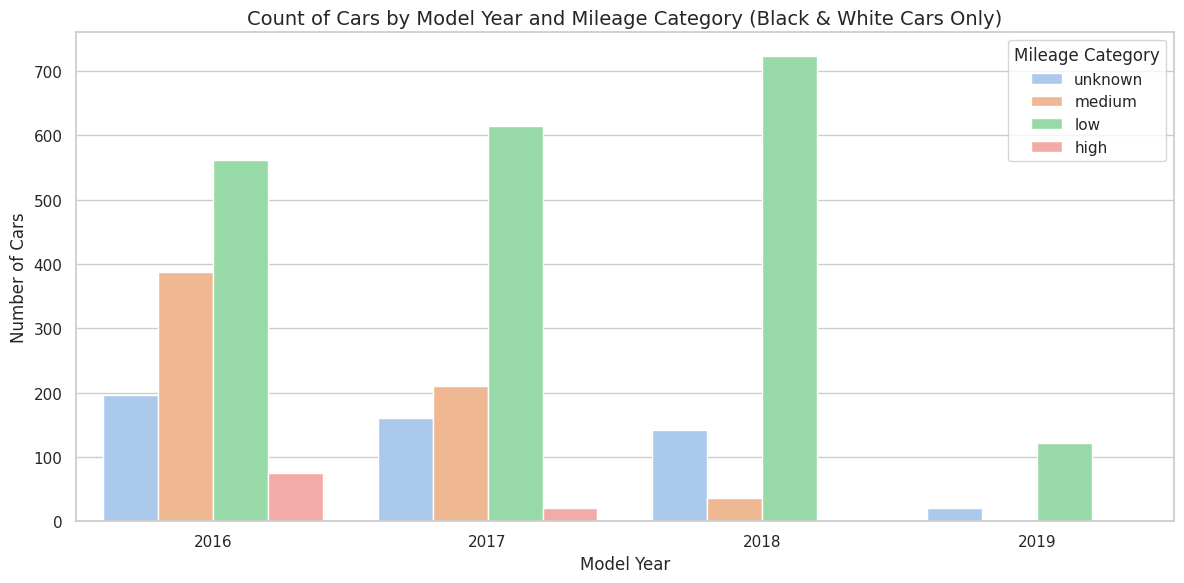

In [ ]:
# in this code I am creating a new column that groups each car’s mileage into a category, based on rules defined in the categorize_mileage function.
# I am also creating a bar graph that can show me the amount of  cars that are black and white ffrom the years 2016 and up and it also shows me the amount of car  which  fall under the low , medium and high mileage category.
df['mileage_category'] = df['odometer'].apply(categorize_mileage)

#Now filter the dataset
filtered_df = df[
    (df['model_year'] >= 2016) &
    (df['paint_color'].isin(['black', 'white'])) &
    (df['condition'].isin(['like new', 'good', 'excellent']))
].copy()

#Plot
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.countplot(
    data=filtered_df,
    x='model_year',
    hue='mileage_category',
    palette='pastel'
)

plt.title('Count of Cars by Model Year and Mileage Category (Black & White Cars Only)', fontsize=14)
plt.xlabel('Model Year')
plt.ylabel('Number of Cars')
plt.legend(title='Mileage Category')
plt.tight_layout()
plt.show()

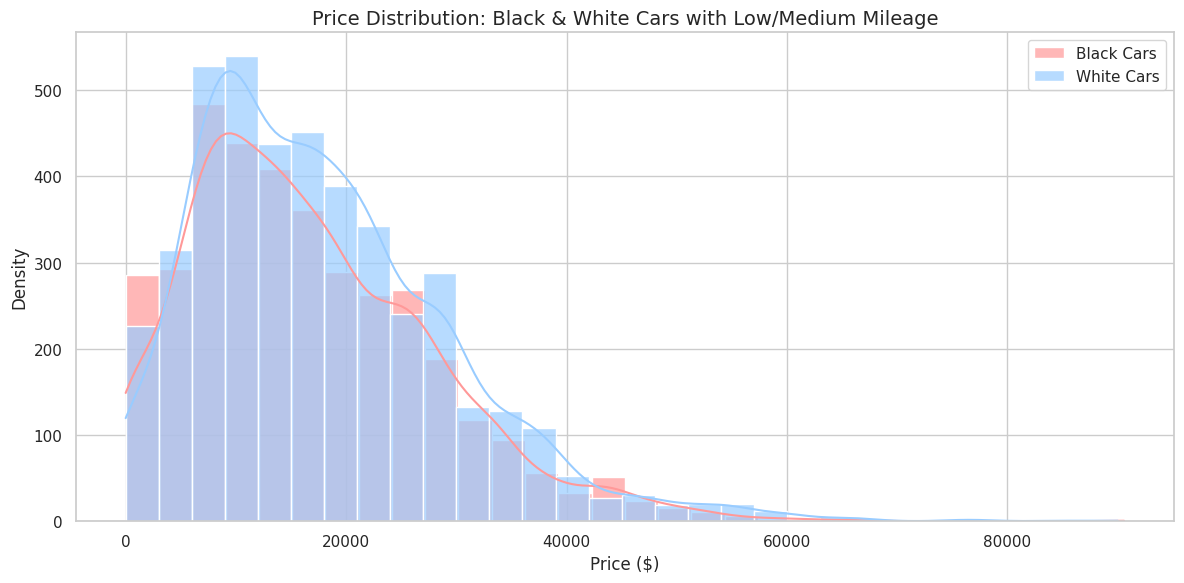

In [ ]:
#in this code I am Filtering for black and white cars with low or medium mileage to create a visusalization histogram.
bw_low_med_df = df[
    (df['paint_color'].isin(['black', 'white'])) &
    (df['mileage_category'].isin(['low', 'medium'])) &
    (df['price'] > 0)  # remove zero/negative prices
]

#Set style
sns.set(style="whitegrid")

#Plot overlaid histograms
plt.figure(figsize=(12, 6))

#Define custom light colors
colors = {'black': '#ff9999', 'white': '#99ccff'}  #light red & light blue

for color in ['black', 'white']:
    subset = bw_low_med_df[bw_low_med_df['paint_color'] == color]
    sns.histplot(
        data=subset,
        x='price',
        bins=30,
        color=colors[color],
        label=f'{color.capitalize()} Cars',
        kde=True,
        stat="count",
        alpha=0.7
    )

plt.title('Price Distribution: Black & White Cars with Low/Medium Mileage', fontsize=14)
plt.xlabel('Price ($)')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.show()


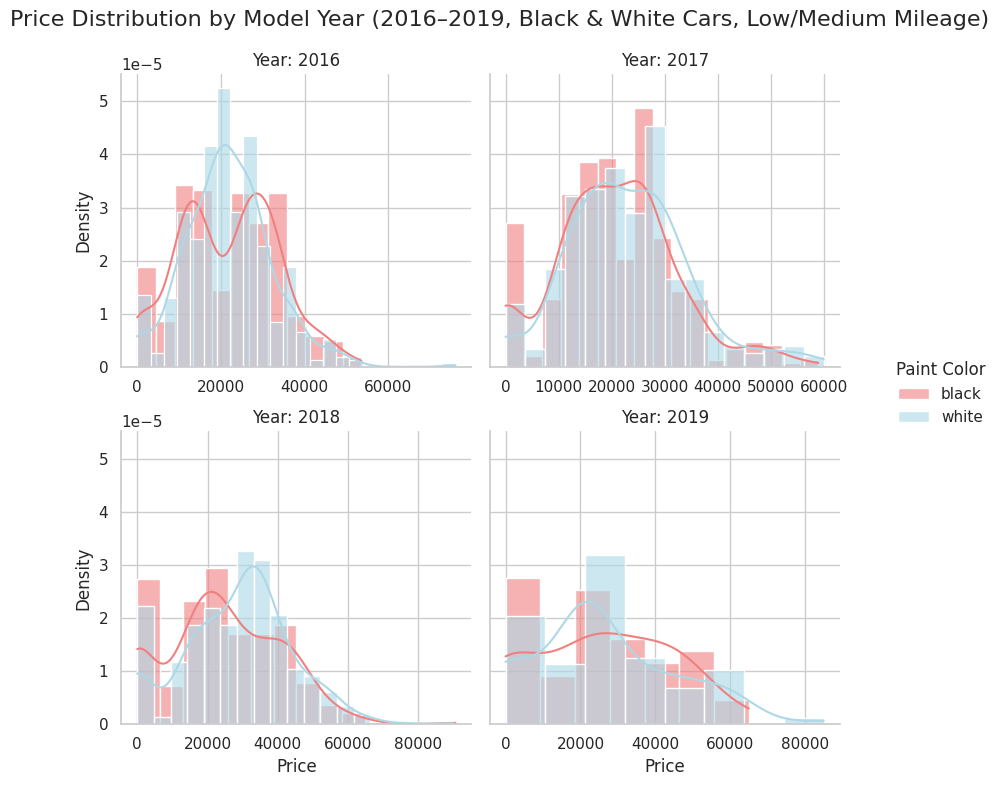

In [ ]:


# in this code I am Filtering fo the model year >= 2016, black/white  car paint, and low/medium mileage to create an aditional histogram
filtered_df = df[
    (df['model_year'] >= 2016) &
    (df['paint_color'].isin(['black', 'white'])) &
    (df['mileage_category'].isin(['low', 'medium']))
].copy()

# Plot: Histograms faceted by model year
sns.set(style="whitegrid")

g = sns.FacetGrid(
    filtered_df,
    col="model_year", col_wrap=2, height=4,
    hue="paint_color", palette=["lightcoral", "lightblue"],
    sharex=False, sharey=True
)

g.map(sns.histplot, "price", stat="density", common_norm=False, alpha=0.6, kde=True)

g.add_legend(title="Paint Color")
g.set_titles("Year: {col_name}")
g.set_axis_labels("Price", "Density")
g.fig.suptitle("Price Distribution by Model Year (2016–2019, Black & White Cars, Low/Medium Mileage)", fontsize=16)
g.fig.subplots_adjust(top=0.9)

plt.show()




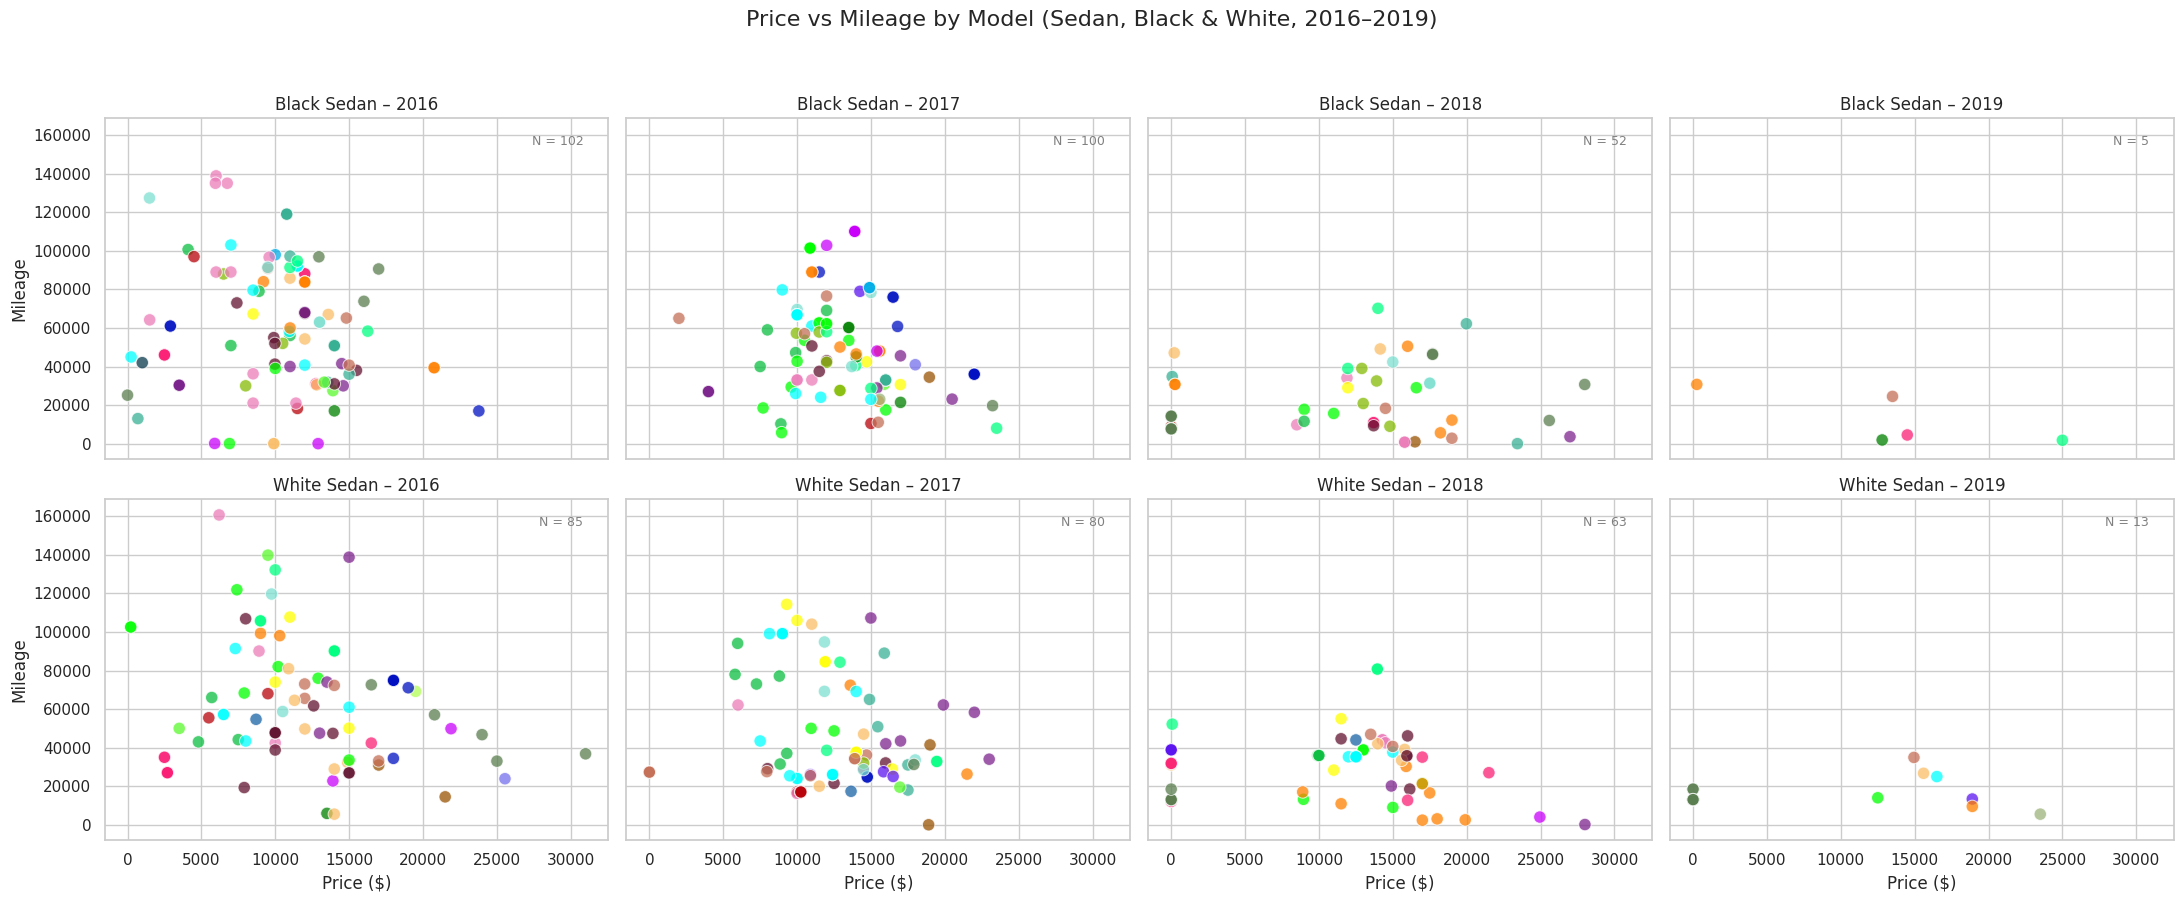

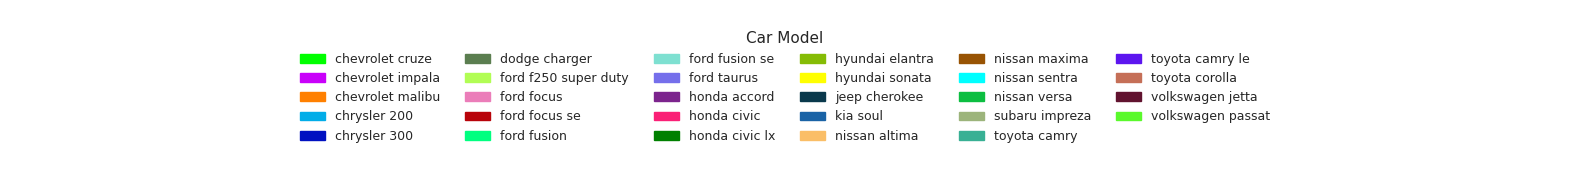

In [ ]:
#In this code I am Filtering  the relevant data I am looking for which is sedans  from the year 2016 and up , also only cars whith white and black paint color  that are only in "like new " , 'good' , or 'excellent condition , I would also like to see the mileage category for each car. with the filtered data I will be creating a total of 8 scatter plots where it shows me sepreatyely  black and white sedans also seperately by year including the price for each car.
filtered_df = df[
    (df['model_year'] >= 2016) &
    (df['model_year'] <= 2019) &
    (df['paint_color'].isin(['black', 'white'])) &
    (df['mileage_category'].isin(['low', 'medium', 'high'])) &
    (df['condition'].isin(['like new', 'good', 'excellent'])) &
    (df['type'] == 'sedan')
].copy()

#Seaborn style
sns.set(style="whitegrid")

#Get all unique car models
unique_models = sorted(filtered_df['model'].unique())

#Generate distinct colors
distinct_colors = distinctipy.get_colors(len(unique_models))
#Convert to hex for matplotlib compatibility
hex_colors = [distinctipy.get_hex(color) for color in distinct_colors]

#Map models to unique colors
palette = dict(zip(unique_models, hex_colors))

#Prepare subplots
fig, axes = plt.subplots(2, 4, figsize=(22, 10), sharex=True, sharey=True)
fig.subplots_adjust(hspace=0.4, wspace=0.25)

colors = ['black', 'white']
years = [2016, 2017, 2018, 2019]

for row_idx, color in enumerate(colors):
    for col_idx, year in enumerate(years):
        ax = axes[row_idx, col_idx]
        subset = filtered_df[
            (filtered_df['paint_color'] == color) &
            (filtered_df['model_year'] == year)
        ]

        if not subset.empty:
            sns.scatterplot(
                data=subset,
                x='price',
                y='odometer',
                hue='model',
                palette=palette,
                alpha=0.75,
                s=80,
                ax=ax,
                legend=False  #legend shown separately
            )
            ax.text(
                0.95, 0.95, f'N = {len(subset)}',
                transform=ax.transAxes,
                ha='right',
                va='top',
                fontsize=9,
                color='gray'
            )

        ax.set_title(f"{color.title()} Sedan – {year}", fontsize=12)
        ax.set_xlabel("Price ($)")
        ax.set_ylabel("Mileage")

fig.suptitle("Price vs Mileage by Model (Sedan, Black & White, 2016–2019)", fontsize=16)
plt.tight_layout(rect=[0, 0.08, 1, 0.95])
plt.show()

# --------- Separate Legend ---------
legend_fig, legend_ax = plt.subplots(figsize=(min(len(unique_models) * 0.7, 20), 2))
legend_ax.axis("off")

legend_handles = [Patch(color=palette[model], label=model) for model in unique_models]

legend = legend_ax.legend(
    handles=legend_handles,
    title="Car Model",
    loc="center",
    ncol=6 if len(unique_models) <= 30 else 10,
    fontsize=9,
    title_fontsize=11,
    frameon=False
)
plt.show()


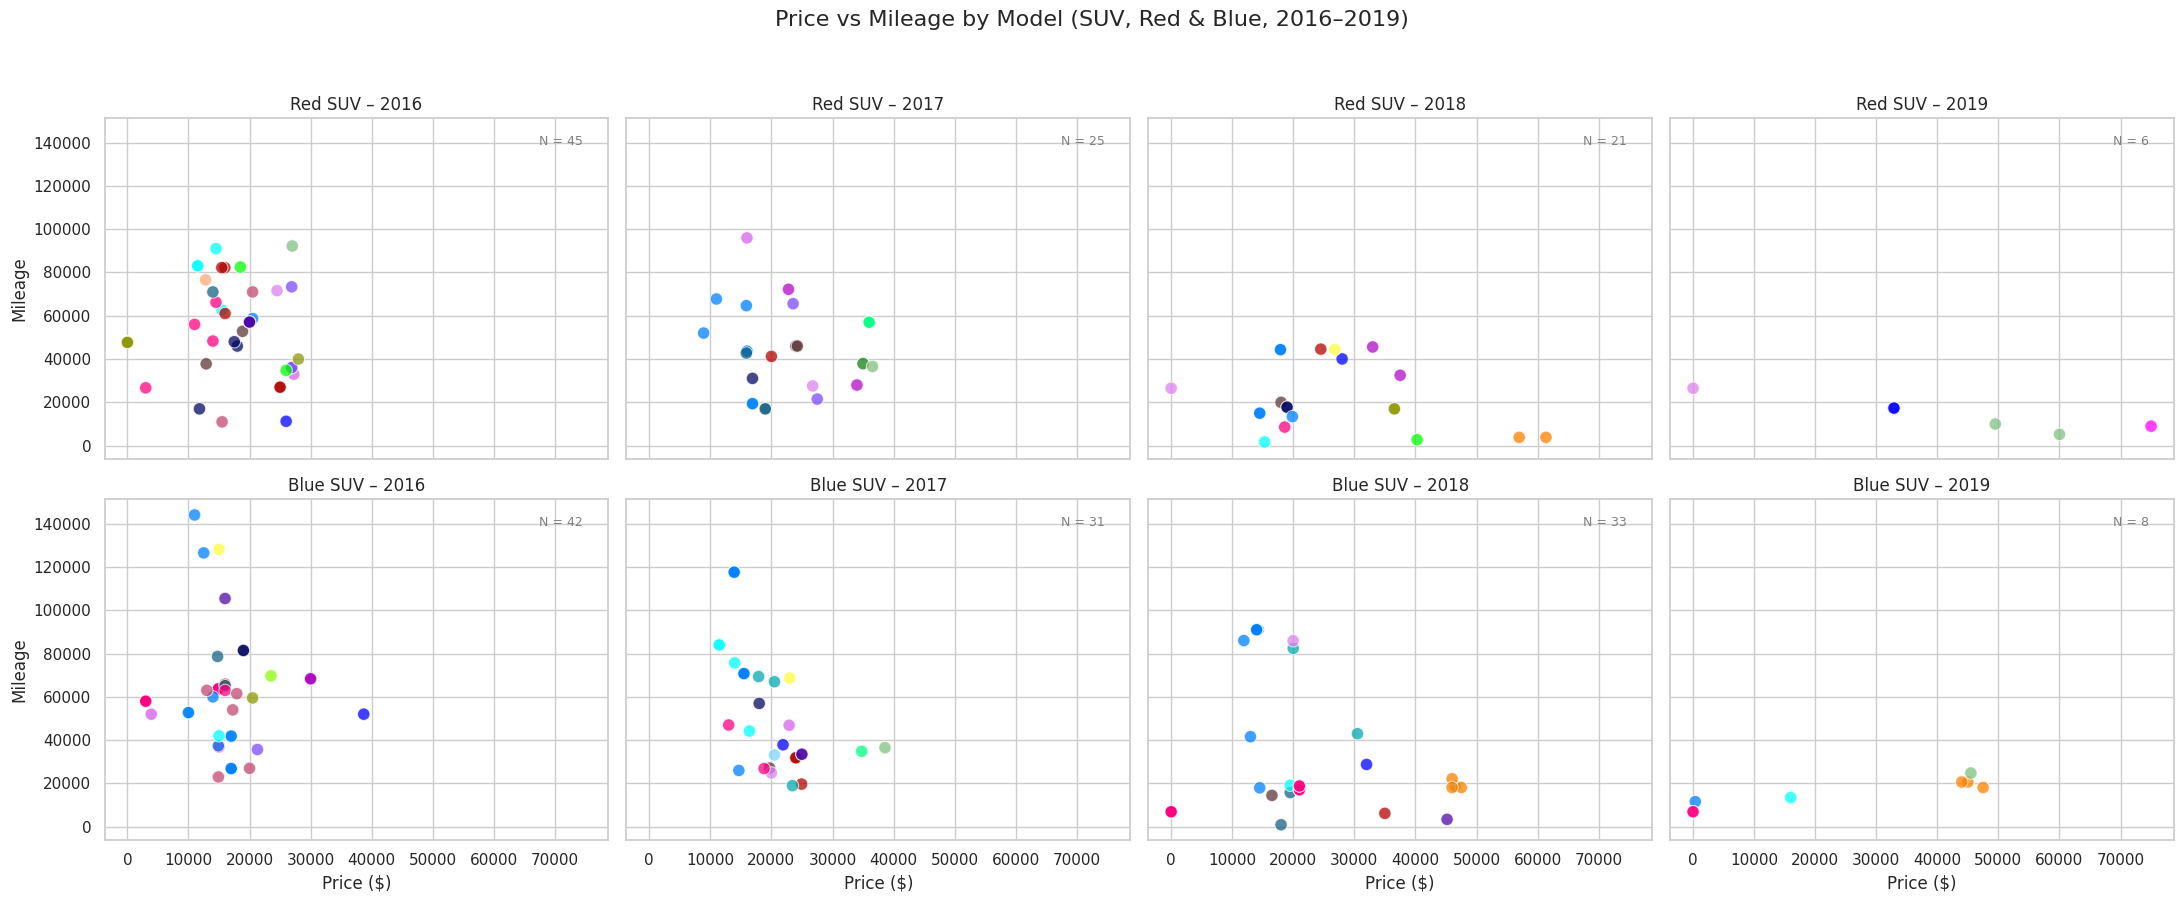

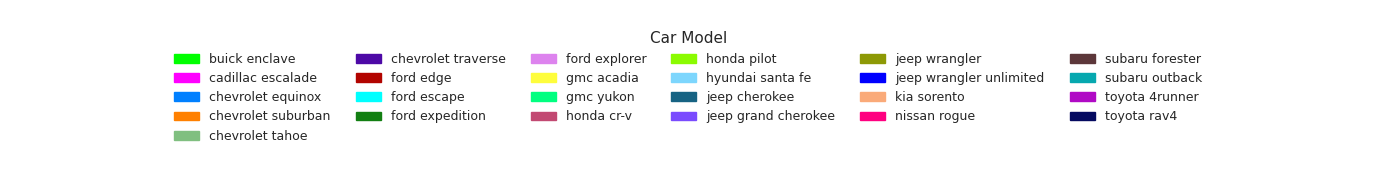

In [ ]:
 #In this code I am Filtering the relevant data I am looking for which is now SUV's  from the year 2016 and up , also only SUV's whith paint color of red  and blue color  that are only in "like new " , 'good' , or 'excellent condition , I would also like to see the mileage category for each car. with the filtered data I will be creating a total of 8 scatter plots where it shows me sepreatyely  red and blue SUV's also seperately by year including the price for each car.
filtered_df = df[
    (df['model_year'] >= 2016) &
    (df['model_year'] <= 2019) &
    (df['paint_color'].isin(['red', 'blue'])) &
    (df['mileage_category'].isin(['low', 'medium', 'high'])) &
    (df['condition'].isin(['like new', 'good', 'excellent'])) &
    (df['type'] == 'SUV')  #Changed to SUV
].copy()

# Seaborn style
sns.set(style="whitegrid")

#Get all unique car models
unique_models = sorted(filtered_df['model'].unique())

#Generate distinct colors
distinct_colors = distinctipy.get_colors(len(unique_models))
hex_colors = [distinctipy.get_hex(color) for color in distinct_colors]
palette = dict(zip(unique_models, hex_colors))

#Prepare subplots
fig, axes = plt.subplots(2, 4, figsize=(22, 10), sharex=True, sharey=True)
fig.subplots_adjust(hspace=0.4, wspace=0.25)

colors = ['red', 'blue']  #Changed colors
years = [2016, 2017, 2018, 2019]

for row_idx, color in enumerate(colors):
    for col_idx, year in enumerate(years):
        ax = axes[row_idx, col_idx]
        subset = filtered_df[
            (filtered_df['paint_color'] == color) &
            (filtered_df['model_year'] == year)
        ]

        if not subset.empty:
            sns.scatterplot(
                data=subset,
                x='price',
                y='odometer',
                hue='model',
                palette=palette,
                alpha=0.75,
                s=80,
                ax=ax,
                legend=False  # legend shown separately
            )
            ax.text(
                0.95, 0.95, f'N = {len(subset)}',
                transform=ax.transAxes,
                ha='right',
                va='top',
                fontsize=9,
                color='gray'
            )

        ax.set_title(f"{color.title()} SUV – {year}", fontsize=12)  # Updated title
        ax.set_xlabel("Price ($)")
        ax.set_ylabel("Mileage")

fig.suptitle("Price vs Mileage by Model (SUV, Red & Blue, 2016–2019)", fontsize=16)
plt.tight_layout(rect=[0, 0.08, 1, 0.95])
plt.show()

# --------- Separate Legend ---------
legend_fig, legend_ax = plt.subplots(figsize=(min(len(unique_models) * 0.7, 20), 2))
legend_ax.axis("off")

legend_handles = [Patch(color=palette[model], label=model) for model in unique_models]

legend = legend_ax.legend(
    handles=legend_handles,
    title="Car Model",
    loc="center",
    ncol=6 if len(unique_models) <= 30 else 10,
    fontsize=9,
    title_fontsize=11,
    frameon=False
)
plt.show()
